In [1]:
from tensorflow.keras import datasets 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
plt.style.use('seaborn')
import statsmodels.api as sm
import tensorflow as tf
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
crop_name = {
    1 : ['Rice' , 'Mango', 'Papaya' ],
    2 : ['Cotton', 'Jute', 'Watermelon', 'Muskmelon', 'Banana', 'Orange'],
    3 : ['Jute', 'Watermelon', 'Muskmelon'],
    4 : ['Rice', 'Jute', 'Watermelon', 'Muskmelon', 'Cotton', 'Jute',  'Banana', 'Orange' ],
    5 : ['Pomegranate'],
    6 : ['Apple', 'Grape', 'Pomegranate'],
    7 : ['Lentil'],
    8 : ['Lentil' , 'Jute', 'Watermelon', 'Muskmelon']
}


#Feature Selection and PreProcessing

In [3]:
df = pd.read_csv("final_data.csv")

In [4]:


X = df[['pH', 'EC', 'OC', 'N', 'P', 'K', 'S', 'Ca', 'Mg', 'Zn', 'Cu',
       'Fe', 'Mn','Tex']]
y = df['label']

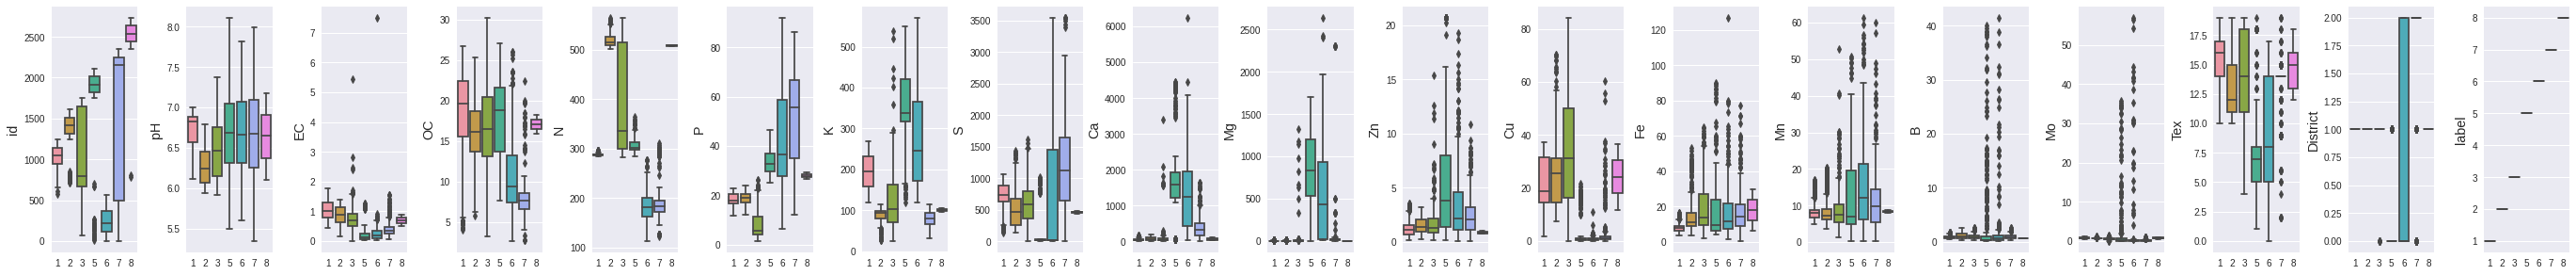

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(len(df.columns)*2,4))
for index, col in enumerate(df.columns):
    ax = axes[index]
    sns.boxplot(y=df.loc[:,col], x=df.loc[:,'label'], ax=ax)
    ax.set_ylabel(ax.get_ylabel(), fontsize='x-large')
    ax.set_xlabel("")
plt.tight_layout(pad=0.5)
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.District= le.fit_transform(df.District.values)

In [7]:
df.Tex= le.fit_transform(df.Tex.values)

In [8]:
X = df

In [9]:
X

,id,pH,EC,OC,N,P,K,S,Ca,Mg,Zn,Cu,Fe,Mn,B,Mo,Tex,District,label
0,0,7.050000,0.160000,5.560000,175.620000,38.260000,324.800000,5.210000,1884,288.000000,1.820000,0.200000,2.830000,2.800000,0.230000,0.130000,2,0,6
1,1,6.880000,0.089000,4.240000,125.440000,26.300000,103.000000,10.420000,1484,336.000000,1.620000,0.450000,6.270000,5.600000,0.230000,0.040000,2,0,7
2,2,5.600000,0.081000,2.780000,150.530000,25.700000,53.800000,7.810000,1644,504.000000,2.840000,0.440000,21.080000,24.110000,0.230000,0.090000,5,0,7
3,3,7.300000,0.164000,10.540000,188.160000,24.700000,190.400000,10.420000,1364,840.000000,7.740000,0.630000,16.420000,11.400000,0.230000,0.210000,2,0,6
4,4,7.220000,0.167000,11.410000,163.070000,40.000000,210.600000,10.420000,2004,168.000000,11.890000,0.610000,7.380000,2.910000,0.120000,0.260000,2,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,2732,6.531352,0.659126,17.283696,507.723181,28.210970,99.076266,464.099932,57,1.407825,0.908700,26.714008,20.307160,8.306451,0.607825,0.728876,14,1,8
2733,2733,6.570766,0.672140,17.198919,507.854437,28.107230,99.429503,462.612618,60,1.410428,0.898288,25.791129,19.426670,8.329504,0.610428,0.745608,14,1,8
2734,2734,6.989972,0.810557,16.297230,509.250472,27.003848,103.186541,446.793514,93,1.438111,0.787555,15.975375,10.061760,8.574701,0.638111,0.923573,16,1,8
2735,2735,6.737222,0.727102,16.840881,508.408768,27.669104,100.921331,456.331240,73,1.421420,0.854319,21.893534,15.708094,8.426866,0.621420,0.816274,15,1,8


In [10]:
y

0       6
1       7
2       7
3       6
4       6
       ..
2732    8
2733    8
2734    8
2735    8
2736    8
Name: label, Length: 2737, dtype: int64

In [11]:
X = (X - X.mean())/X.std()
X

,id,pH,EC,OC,N,P,K,S,Ca,Mg,Zn,Cu,Fe,Mn,B,Mo,Tex,District,label
0,-1.731102,1.048506,-1.037491,-1.677114,-1.226424,0.557077,1.249438,-1.023138,1.526581,0.178608,-0.192447,-0.946238,-1.027180,-0.943989,-0.315847,-0.238335,-2.426073,-1.488630,0.585099
1,-1.729836,0.650186,-1.200279,-1.911359,-1.594217,-0.124451,-0.593699,-1.014431,1.071609,0.288384,-0.255630,-0.931182,-0.754868,-0.599579,-0.315847,-0.260285,-2.426073,-1.488630,0.994668
2,-1.728571,-2.348933,-1.218622,-2.170448,-1.410321,-0.158642,-1.002546,-1.018793,1.253598,0.672599,0.129790,-0.931784,0.417502,1.677216,-0.315847,-0.248091,-1.721297,-1.488630,0.994668
3,-1.727305,1.634272,-1.028320,-0.793373,-1.134513,-0.215626,0.132587,-1.014431,0.935117,1.441030,1.677788,-0.920342,0.048613,0.113841,-0.315847,-0.218823,-2.426073,-1.488630,0.585099
4,-1.726040,1.446827,-1.021441,-0.638984,-1.318409,0.656229,0.300447,-1.014431,1.663073,-0.095832,2.988847,-0.921546,-0.666999,-0.930458,-0.344399,-0.206628,-2.426073,-1.488630,0.585099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,1.726040,-0.166718,0.106901,0.403351,1.207717,-0.015557,-0.626305,-0.256227,-0.551505,-0.476827,-0.480343,0.650537,0.356323,-0.266676,-0.217776,-0.092271,0.393030,0.101682,1.404237
2733,1.727305,-0.074369,0.136739,0.388306,1.208679,-0.021468,-0.623369,-0.258713,-0.548092,-0.476821,-0.483632,0.594957,0.286623,-0.263840,-0.217100,-0.088190,0.393030,0.101682,1.404237
2734,1.728571,0.907857,0.454101,0.228294,1.218911,-0.084343,-0.592149,-0.285150,-0.510557,-0.476758,-0.518615,0.003815,-0.454709,-0.233680,-0.209914,-0.044786,0.862880,0.101682,1.404237
2735,1.729836,0.315649,0.262756,0.324770,1.212742,-0.046434,-0.610972,-0.269211,-0.533306,-0.476796,-0.497523,0.360229,-0.007742,-0.251865,-0.214247,-0.070955,0.627955,0.101682,1.404237


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2189, 19) (548, 19) (2189,) (548,)


#Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier
classifer = DecisionTreeClassifier(criterion='entropy', random_state=0)
# providing the training dataset
classifer.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [14]:
y_pred = classifer.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score

# accuracy
accuracy_score(y_pred,y_test)

1.0

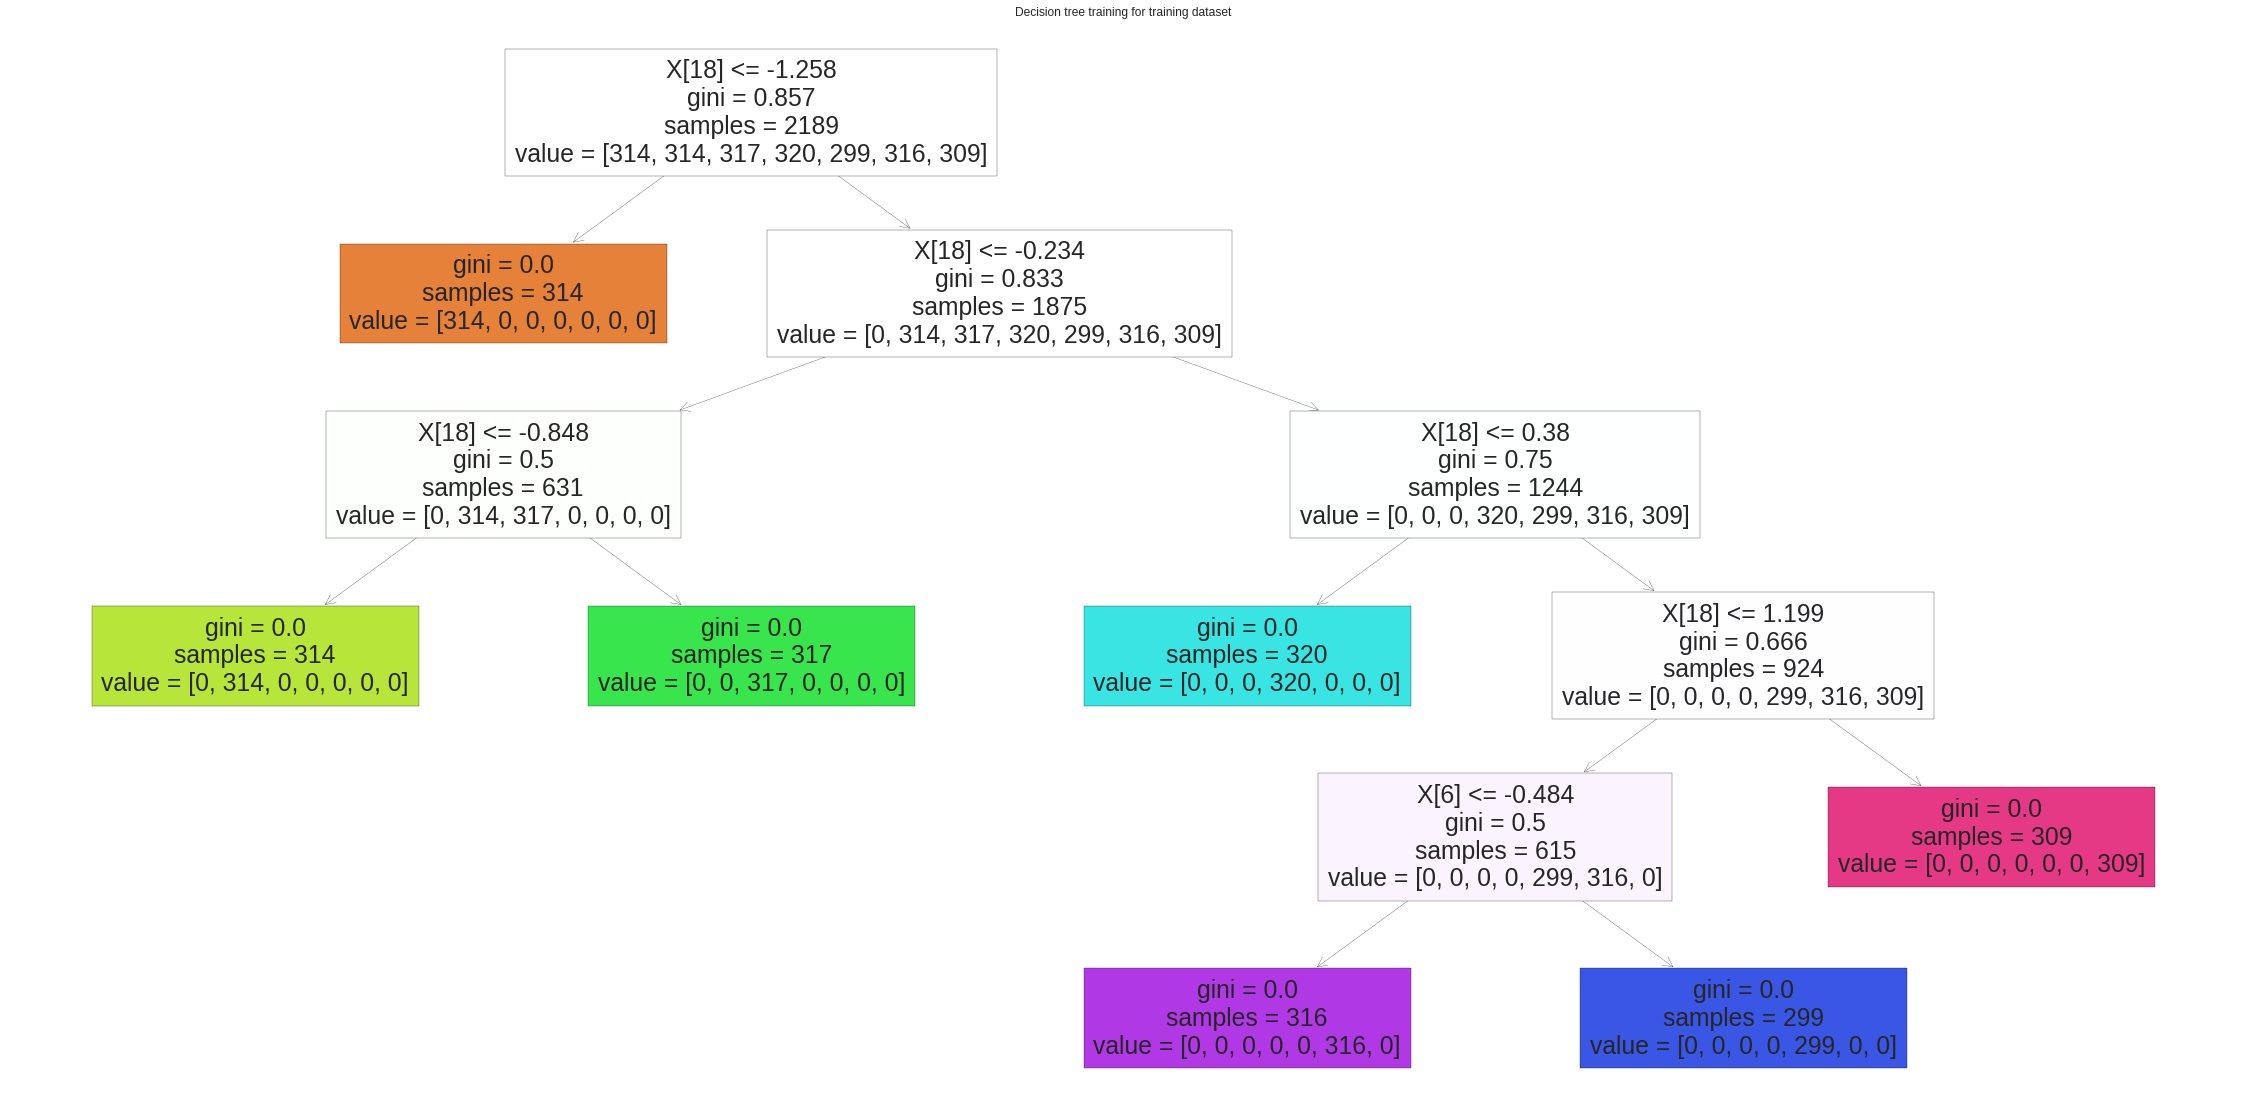

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()

# output size of decision tree
plt.figure(figsize=(40,20))

# providing the training dataset
clf = clf.fit(X_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree training for training dataset")
plt.show()

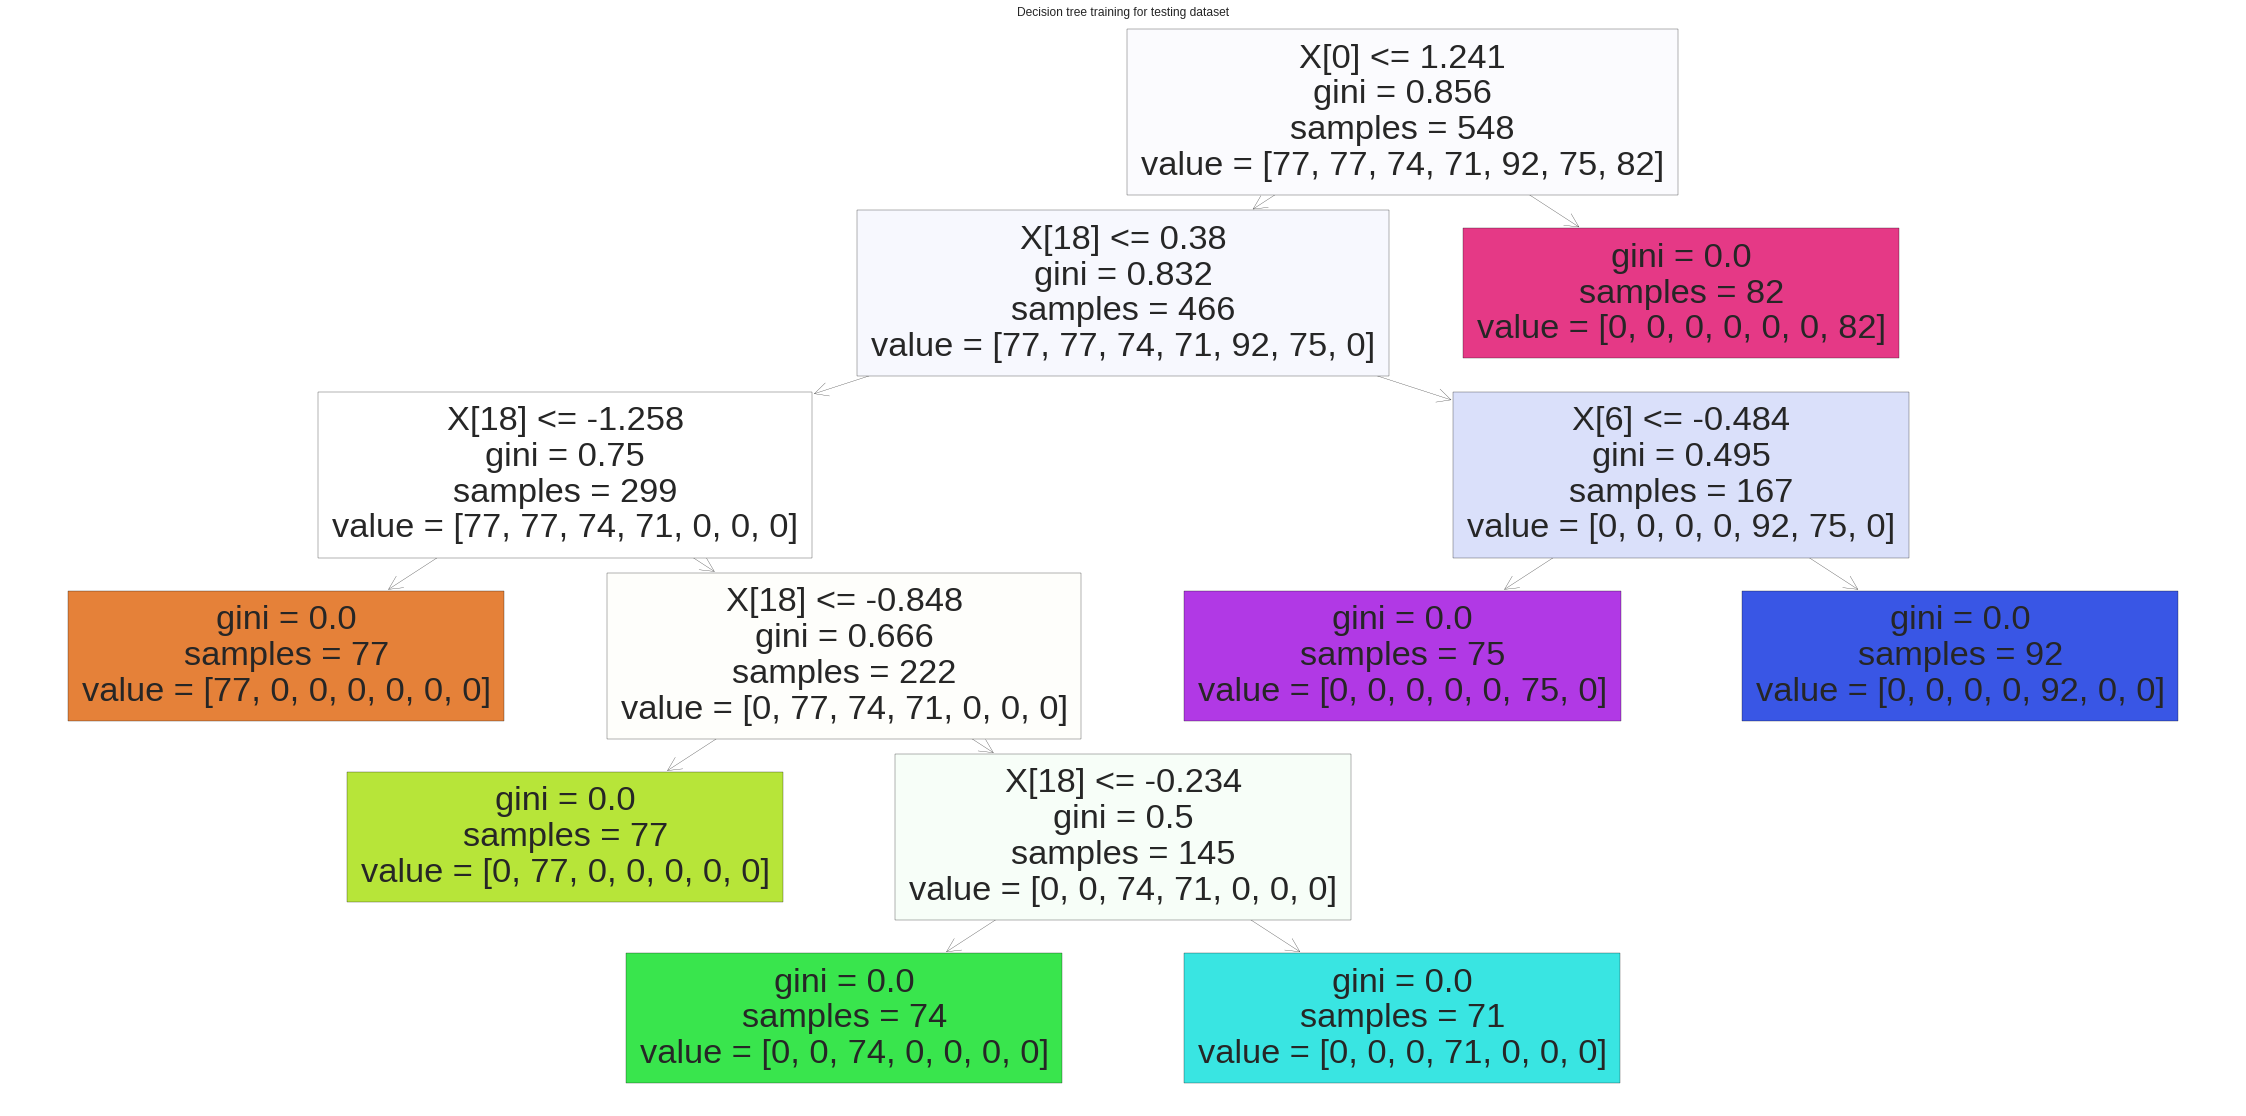

In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()

# output size of decision tree
plt.figure(figsize=(40,20))

# providing the training dataset
clf = clf.fit(X_test, y_test)
plot_tree(clf, filled=True)
plt.title("Decision tree training for testing dataset")
plt.show()

In [18]:
from sklearn import tree

# text based tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 1.24
|   |--- feature_18 <= 0.38
|   |   |--- feature_18 <= -1.26
|   |   |   |--- class: 1
|   |   |--- feature_18 >  -1.26
|   |   |   |--- feature_18 <= -0.85
|   |   |   |   |--- class: 2
|   |   |   |--- feature_18 >  -0.85
|   |   |   |   |--- feature_18 <= -0.23
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_18 >  -0.23
|   |   |   |   |   |--- class: 5
|   |--- feature_18 >  0.38
|   |   |--- feature_6 <= -0.48
|   |   |   |--- class: 7
|   |   |--- feature_6 >  -0.48
|   |   |   |--- class: 6
|--- feature_0 >  1.24
|   |--- class: 8



In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        77
           2       1.00      1.00      1.00        77
           3       1.00      1.00      1.00        74
           5       1.00      1.00      1.00        71
           6       1.00      1.00      1.00        92
           7       1.00      1.00      1.00        75
           8       1.00      1.00      1.00        82

    accuracy                           1.00       548
   macro avg       1.00      1.00      1.00       548
weighted avg       1.00      1.00      1.00       548



#SVM

In [20]:
from tensorflow.keras import datasets 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
plt.style.use('seaborn')
import statsmodels.api as sm
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [21]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

In [22]:
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

In [23]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  97.99
F1 (Polynomial Kernel):  98.00


In [24]:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  83.76
F1 (RBF Kernel):  84.37


In [25]:
print(classification_report(poly_pred, y_test))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        77
           2       1.00      0.99      0.99        78
           3       0.99      0.92      0.95        79
           5       0.97      0.99      0.98        70
           6       0.97      0.99      0.98        90
           7       0.93      0.97      0.95        72
           8       1.00      1.00      1.00        82

    accuracy                           0.98       548
   macro avg       0.98      0.98      0.98       548
weighted avg       0.98      0.98      0.98       548



#ANN Model-1

In [26]:
from tensorflow.keras import datasets 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import cv2
plt.style.use('seaborn')
import statsmodels.api as sm
import tensorflow as tf

In [27]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [28]:
import tensorflow as tf
from tensorflow import keras

In [29]:
from tensorflow.keras.layers import Flatten, Dense, InputLayer

In [30]:
hp_hidden_units = 128
hp_epoch = 30
hp_batch_size = 5
hp_lr = float(1/10)


In [31]:
l1 = Dense(15)
l2 = Dense(10, activation = tf.nn.relu)
l3 = Dense(10)
l4 = Dense(10)
l5 = Dense(30, activation = tf.nn.sigmoid)
m1 = keras.models.Sequential(
    [l1, l2, l3, l4, l5]
)


In [32]:
m1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
           optimizer='adam',
           metrics=["accuracy"])


In [33]:
history1 =m1.fit(X_train, y_train, batch_size= hp_batch_size, epochs=hp_epoch)

Epoch 1/30
438/438 [==============================] - 4s 5ms/step - loss: 2.8024 - accuracy: 0.1645
Epoch 2/30
438/438 [==============================] - 2s 5ms/step - loss: 2.5822 - accuracy: 0.3015
Epoch 3/30
438/438 [==============================] - 2s 4ms/step - loss: 2.5499 - accuracy: 0.4171
Epoch 4/30
438/438 [==============================] - 3s 6ms/step - loss: 2.5392 - accuracy: 0.4317
Epoch 5/30
438/438 [==============================] - 2s 5ms/step - loss: 2.5347 - accuracy: 0.4884
Epoch 6/30
438/438 [==============================] - 2s 4ms/step - loss: 2.5295 - accuracy: 0.5331
Epoch 7/30
438/438 [==============================] - 1s 2ms/step - loss: 2.5235 - accuracy: 0.5258
Epoch 8/30
438/438 [==============================] - 1s 2ms/step - loss: 2.5216 - accuracy: 0.5578
Epoch 9/30
438/438 [==============================] - 1s 2ms/step - loss: 2.5197 - accuracy: 0.5455
Epoch 10/30
438/438 [==============================] - 1s 2ms/step - loss: 2.5189 - accuracy: 0.5532

In [34]:
p1 = m1.predict(X_test)

In [35]:
import numpy as np
p1_reduced = [np.argmax(pr) for pr in p1]
p1_reduced[58]


7

In [36]:
from sklearn.metrics import accuracy_score
print("Model 1: " + str(accuracy_score(p1_reduced, y_test)))


Model 1: 0.7463503649635036


In [37]:
y_test[58]

7.0

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [39]:
matrix = confusion_matrix(y_test,p1_reduced)
matrix

array([[11, 66,  0,  0,  0,  0,  0],
       [ 0, 47, 30,  0,  0,  0,  0],
       [ 0,  0, 62,  0,  0,  0, 12],
       [ 0,  0,  0, 70,  1,  0,  0],
       [ 0,  0,  0,  0, 62, 30,  0],
       [ 0,  0,  0,  0,  0, 75,  0],
       [ 0,  0,  0,  0,  0,  0, 82]])

In [40]:
print(classification_report(y_test,p1_reduced))


              precision    recall  f1-score   support

         1.0       1.00      0.14      0.25        77
         2.0       0.42      0.61      0.49        77
         3.0       0.67      0.84      0.75        74
         5.0       1.00      0.99      0.99        71
         6.0       0.98      0.67      0.80        92
         7.0       0.71      1.00      0.83        75
         8.0       0.87      1.00      0.93        82

    accuracy                           0.75       548
   macro avg       0.81      0.75      0.72       548
weighted avg       0.81      0.75      0.72       548



In [41]:
df.to_csv('file_name.csv', encoding='utf-8')

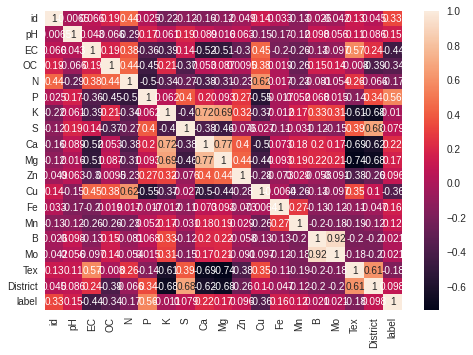

In [42]:
sns.heatmap(df.corr(),annot=True)

#ANN model-2

In [43]:
hp_hidden_units =20
hp_epoch = 25
hp_batch_size = 30
hp_lr = float(1/10)

In [44]:
l1 = Dense(20)
l2 = Dense(hp_hidden_units, activation = tf.nn.relu)
l3 = Dense(20, activation = tf.nn.relu)
l4 = Dense(10, activation = tf.nn.relu)
l5 = Dense(10, activation = tf.nn.softmax)
m2 = keras.models.Sequential(
    [l1, l2, l3, l4, l5]
)

In [45]:
import keras
from keras.callbacks import EarlyStopping


m2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
           
           optimizer='rmsprop',
           metrics=["accuracy"])

In [46]:
history2 =m2.fit(X_train, y_train, batch_size= hp_batch_size, epochs=hp_epoch, validation_split=0.2,
                 shuffle=True, verbose=1
                 
                    )

Epoch 1/25
59/59 [==============================] - 1s 6ms/step - loss: 2.2587 - accuracy: 0.3444 - val_loss: 2.1568 - val_accuracy: 0.4292
Epoch 2/25
59/59 [==============================] - 0s 3ms/step - loss: 2.0449 - accuracy: 0.4712 - val_loss: 1.9661 - val_accuracy: 0.5000
Epoch 3/25
59/59 [==============================] - 0s 3ms/step - loss: 1.9203 - accuracy: 0.5020 - val_loss: 1.8887 - val_accuracy: 0.5068
Epoch 4/25
59/59 [==============================] - 0s 3ms/step - loss: 1.8262 - accuracy: 0.6516 - val_loss: 1.7505 - val_accuracy: 0.8105
Epoch 5/25
59/59 [==============================] - 0s 3ms/step - loss: 1.6801 - accuracy: 0.8395 - val_loss: 1.6323 - val_accuracy: 0.8790
Epoch 6/25
59/59 [==============================] - 0s 4ms/step - loss: 1.6130 - accuracy: 0.8784 - val_loss: 1.5972 - val_accuracy: 0.8927
Epoch 7/25
59/59 [==============================] - 0s 3ms/step - loss: 1.5832 - accuracy: 0.9058 - val_loss: 1.5743 - val_accuracy: 0.9018
Epoch 8/25
59/59 [==

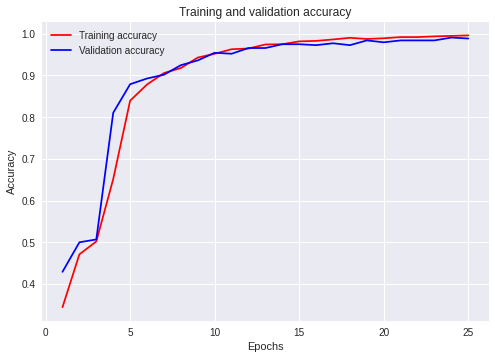

In [47]:
history_dict = history2.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot

# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

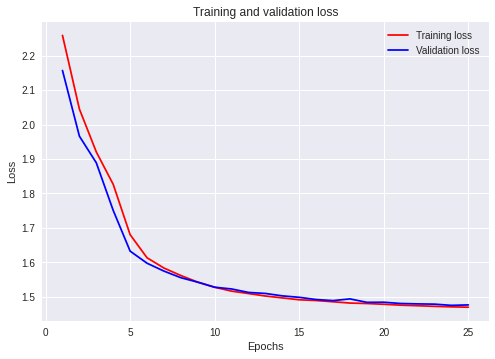

In [48]:
# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot

# "r" is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

[2.1410869e-13 3.8542991e-09 9.3609623e-14 3.5032168e-05 1.7210686e-16
 9.9996197e-01 2.4567630e-06 5.0066348e-07 2.1040365e-13 3.8929888e-14]
1.0
              precision    recall  f1-score   support

         1.0       0.99      1.00      0.99        77
         2.0       1.00      1.00      1.00        77
         3.0       1.00      0.99      0.99        74
         5.0       1.00      1.00      1.00        71
         6.0       1.00      0.97      0.98        92
         7.0       0.96      1.00      0.98        75
         8.0       1.00      1.00      1.00        82

    accuracy                           0.99       548
   macro avg       0.99      0.99      0.99       548
weighted avg       0.99      0.99      0.99       548



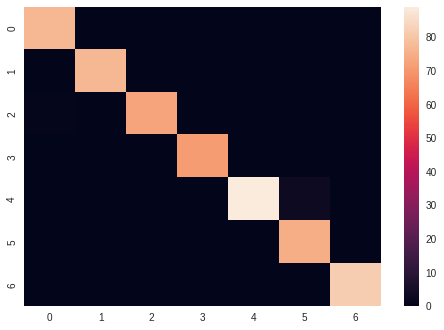

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
sns.color_palette("Set2")
preds = m2.predict(X_test) 
print(preds[0]) 
print(np.sum(preds[0])) 

matrix = confusion_matrix(y_test, preds.argmax(axis=1))
matrix
print(classification_report(y_test, preds.argmax(axis=1)))
sns.heatmap(matrix)

In [50]:
crop_name[np.argmax(preds[10])]

['Cotton', 'Jute', 'Watermelon', 'Muskmelon', 'Banana', 'Orange']

In [51]:
crop_name[y_test[10]]

['Cotton', 'Jute', 'Watermelon', 'Muskmelon', 'Banana', 'Orange']

#random forest

In [52]:
labels = np.array(y)

In [53]:
features = np.array(X)

In [54]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)


In [55]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (2052, 19)
Training Labels Shape: (2052,)
Testing Features Shape: (685, 19)
Testing Labels Shape: (685,)


In [56]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels);

In [57]:
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.0 degrees.


In [58]:
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.99 %.


In [59]:
!pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:

from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

#xgboost


In [61]:
!pip3 install xgboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [63]:
modelXG = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')


In [65]:
modelXG.fit(X_train, y_train)


XGBClassifier(eval_metric='mlogloss', objective='multi:softprob',
              use_label_encoder=False)

In [67]:
y_predxg = modelXG.predict(X_test)


In [68]:
accuracy = accuracy_score(y_test, y_predxg)
accuracy

1.0

In [69]:
print(classification_report(y_test,y_predxg))


              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        77
         2.0       1.00      1.00      1.00        77
         3.0       1.00      1.00      1.00        74
         5.0       1.00      1.00      1.00        71
         6.0       1.00      1.00      1.00        92
         7.0       1.00      1.00      1.00        75
         8.0       1.00      1.00      1.00        82

    accuracy                           1.00       548
   macro avg       1.00      1.00      1.00       548
weighted avg       1.00      1.00      1.00       548

